In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density']

In [5]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

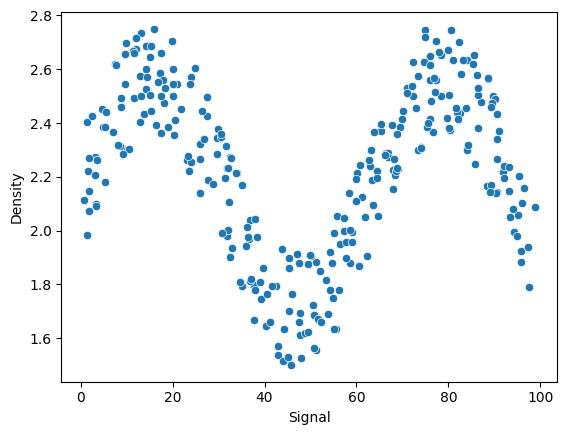

In [6]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [ ]:
#Based on the graph, the feature has non-linear relationship with the target variable
#
#By the way, it was possible for us to see the relationship, because the data has only 1 feature
#
#In case of larger number of features, we could not see the relationship on the graph
#
#Therefore, we need to evalute model performance with METRICS!!!!
#And check what results will show any of models

In [50]:
X = df['Signal'].values.reshape(-1, 1)
#or just
#X = df[['Signal']]
y = df['Density']

In [44]:
X

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708],
       [89.64797256],
       [69.49273293],
       [20.15052036],
       [82.25633703],
       [64.42480217],
       [38.42706534],
       [ 9.89157994],
       [31.7410984 ],
       [90.4960676 ],
       [13.19342555],
       [ 9.55665673],
       [26.00550577],
       [24.81782725],
       [40.29631043],
       [29.60926638],
       [76.57740035],
       [82.61598742],
       [ 1.66229161],
       [17.32519267],
       [35.05157441],
       [63.47748521],
       [13.68823691],
       [17.49779896],
       [ 1.86382485],
       [17.96684624],
       [23.9388581 ],
       [66.36433682],
       [34.02717884],
       [76.03302052],
       [82.66759709],
       [66.78076834],
       [47.4528517 ],
       [74.02752794],
       [86.20473574],
       [72.24767039],
       [80.33899095],
       [36.86719496],
       [31.92883259],
       [85.68535822],
       [78.45459768],
       [19

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression

In [63]:
lr_model = LinearRegression()

In [64]:
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
lr_pred = lr_model.predict(X_test)
lr_pred
#One of the signal that a regression model does not work well
#the values are too similar

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [68]:
mean_squared_error(y_test, lr_pred)

0.06605167265148638

In [69]:
mean_absolute_error(y_test, lr_pred)

0.211198973318633

In [70]:
root_mean_squared_error(y_test, lr_pred)

0.2570051996584629

In [74]:
signal_range = np.arange(0, 100)

In [76]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

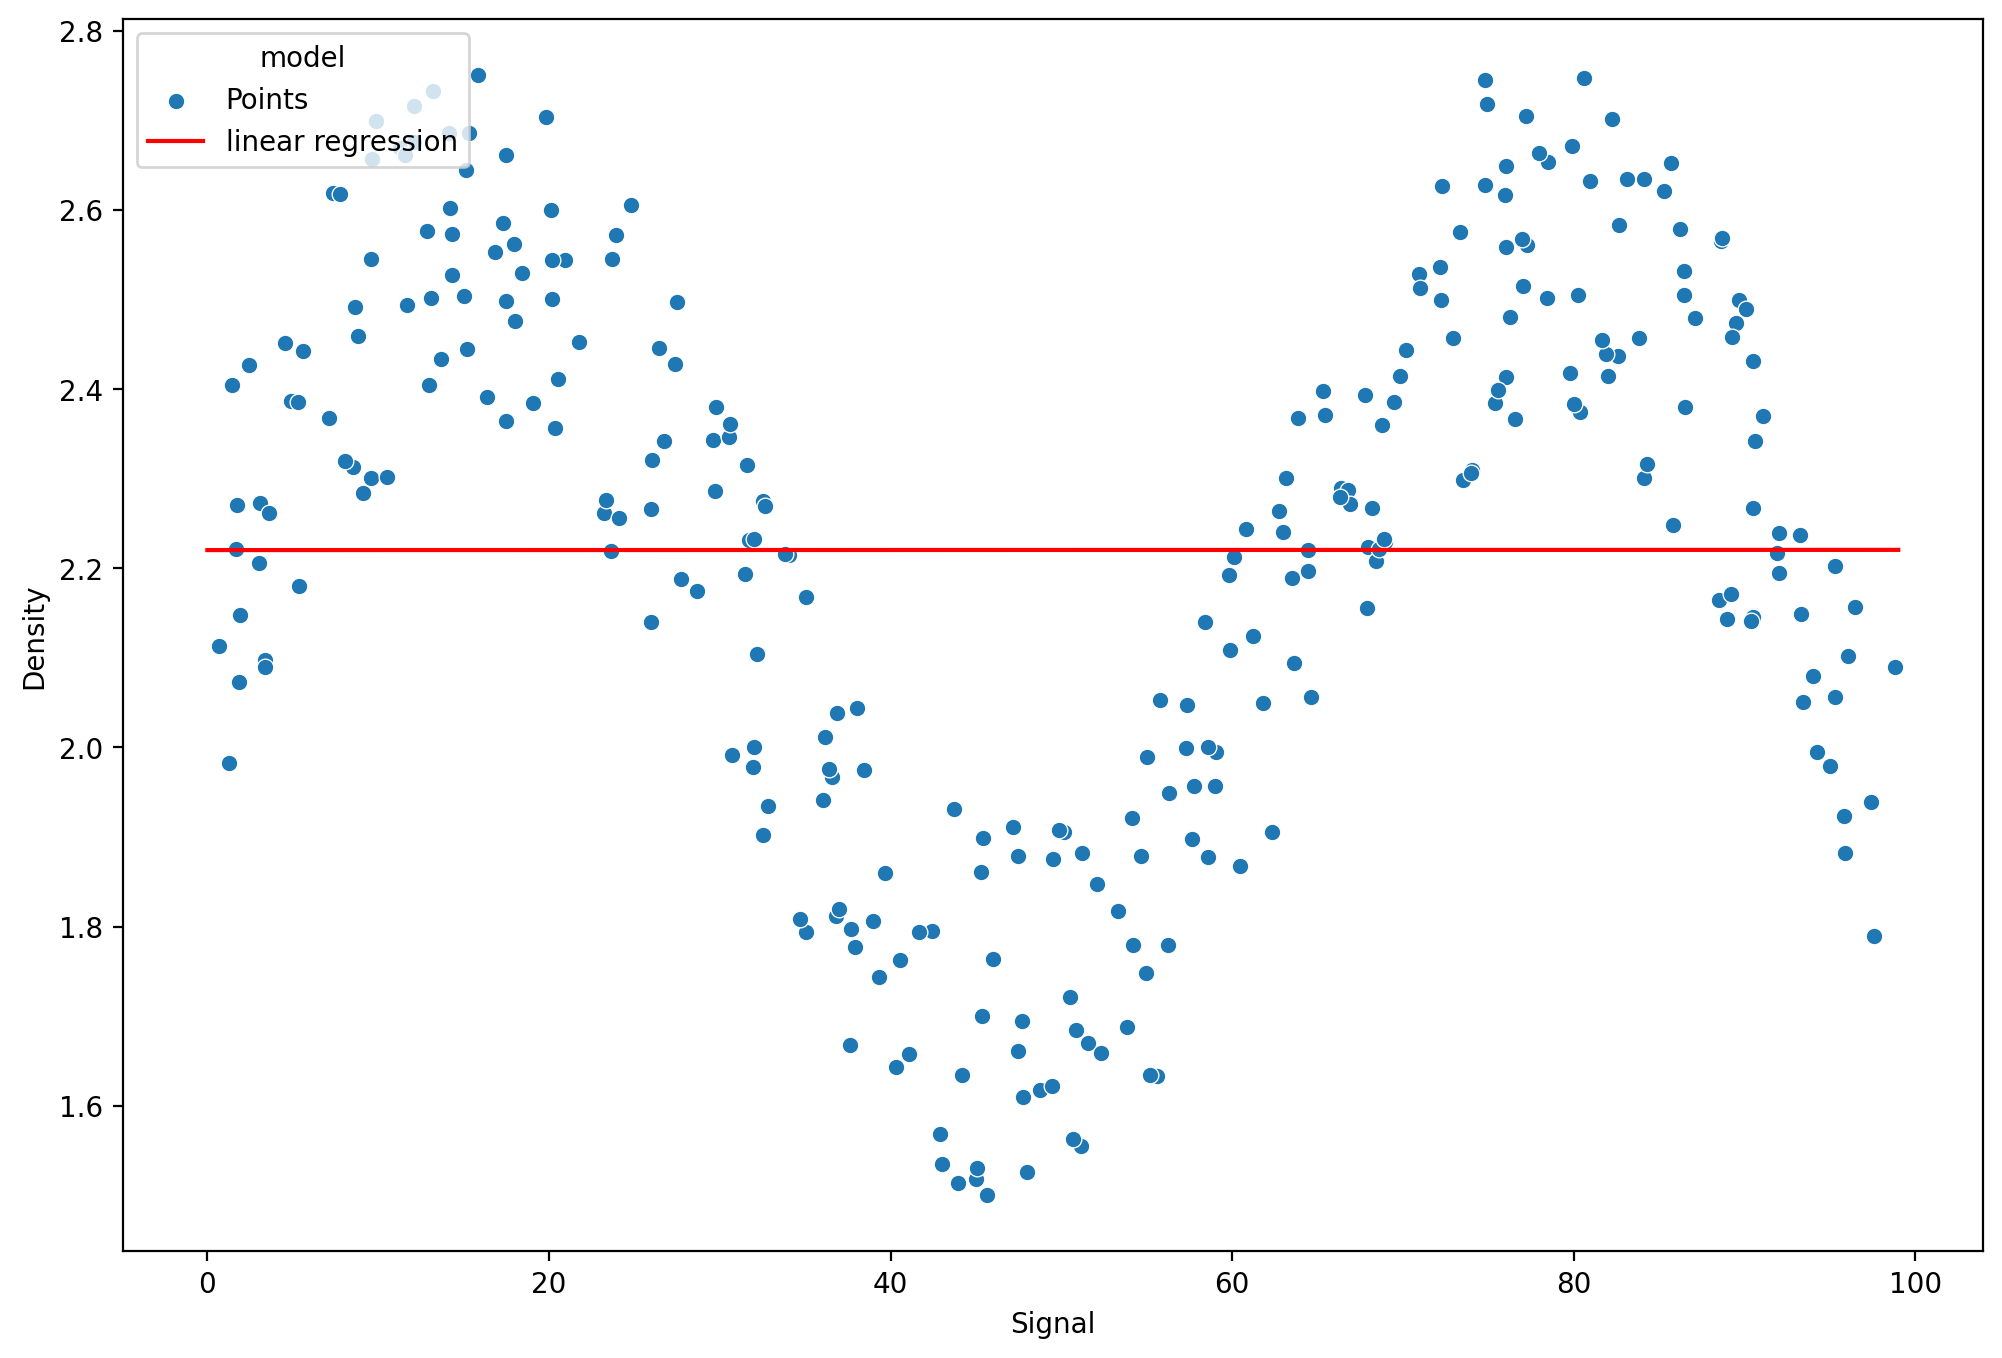

In [100]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds, color='red')
plt.legend(['Points', 'linear regression'], title='model', loc='upper left')

#how the linear model transforms the data (red line)

In [101]:
residuals = y_test - lr_pred
residuals

176   -0.040521
250    0.400760
12     0.011315
16     0.100494
258   -0.312308
281   -0.430969
226    0.043560
284   -0.072020
147    0.276388
228    0.221894
235   -0.323090
123   -0.297062
221    0.046274
270   -0.027629
78     0.194580
89     0.440978
4      0.232041
143    0.436184
19     0.122822
259    0.140217
200    0.040921
41    -0.181489
208    0.323389
15     0.325185
153    0.080322
285    0.139479
169   -0.221227
265   -0.561795
13     0.211214
212    0.079845
Name: Density, dtype: float64

Text(0, 0.5, 'Residuals')

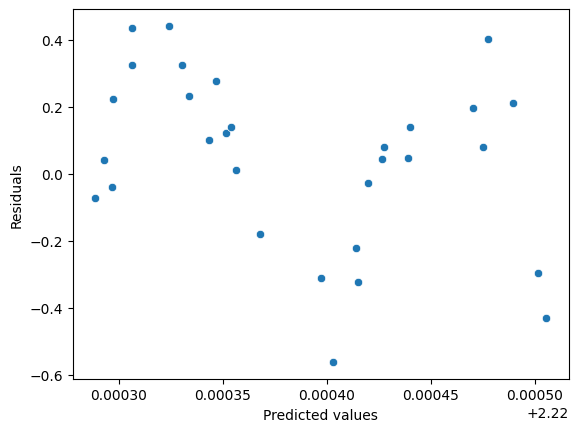

In [ ]:
sns.scatterplot(x=lr_pred, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

#GRAPH OF RESIDUALS WITH PREDICTED VALUES

<Axes: xlabel='Density', ylabel='Density'>

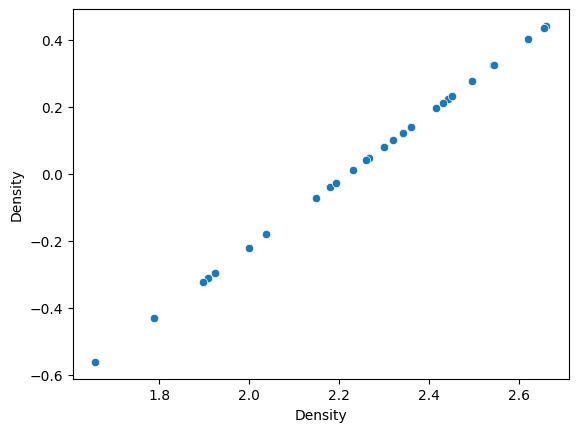

In [ ]:
sns.scatterplot(x=y_test, y=residuals)

#GRAPH OF RESIDUALS WITH ACTUAL VALUES

<Axes: xlabel='Density', ylabel='Count'>

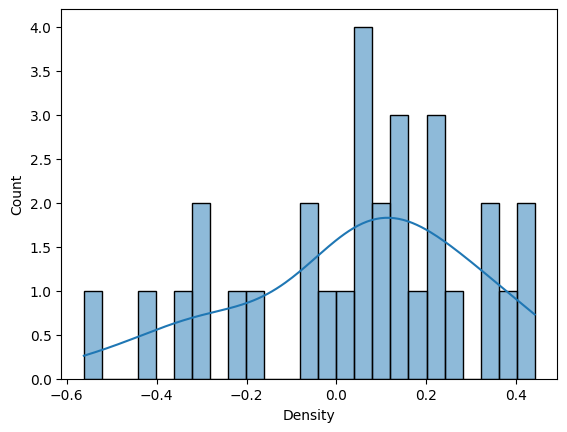

In [ ]:
sns.histplot(data=residuals, kde=True, bins=25)
#GRAPH OF RESIDUALS DISTRIBUTION

In [174]:
def run_model(model, X_train, y_train, X_test, y_test):
    #model fitting
    model.fit(X_train, y_train)

    #model evaluation metrics
    model_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, model_pred)
    mse = mean_squared_error(y_test, model_pred)
    mae = mean_absolute_error(y_test, model_pred)

    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")

    #drawing graphs
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')

    plt.plot(signal_range, signal_preds, color='red')
    plt.legend(['Points', type(model)], title='model', loc='upper left')

    

RMSE: 0.2570051996584629
MSE: 0.06605167265148638
MAE: 0.211198973318633


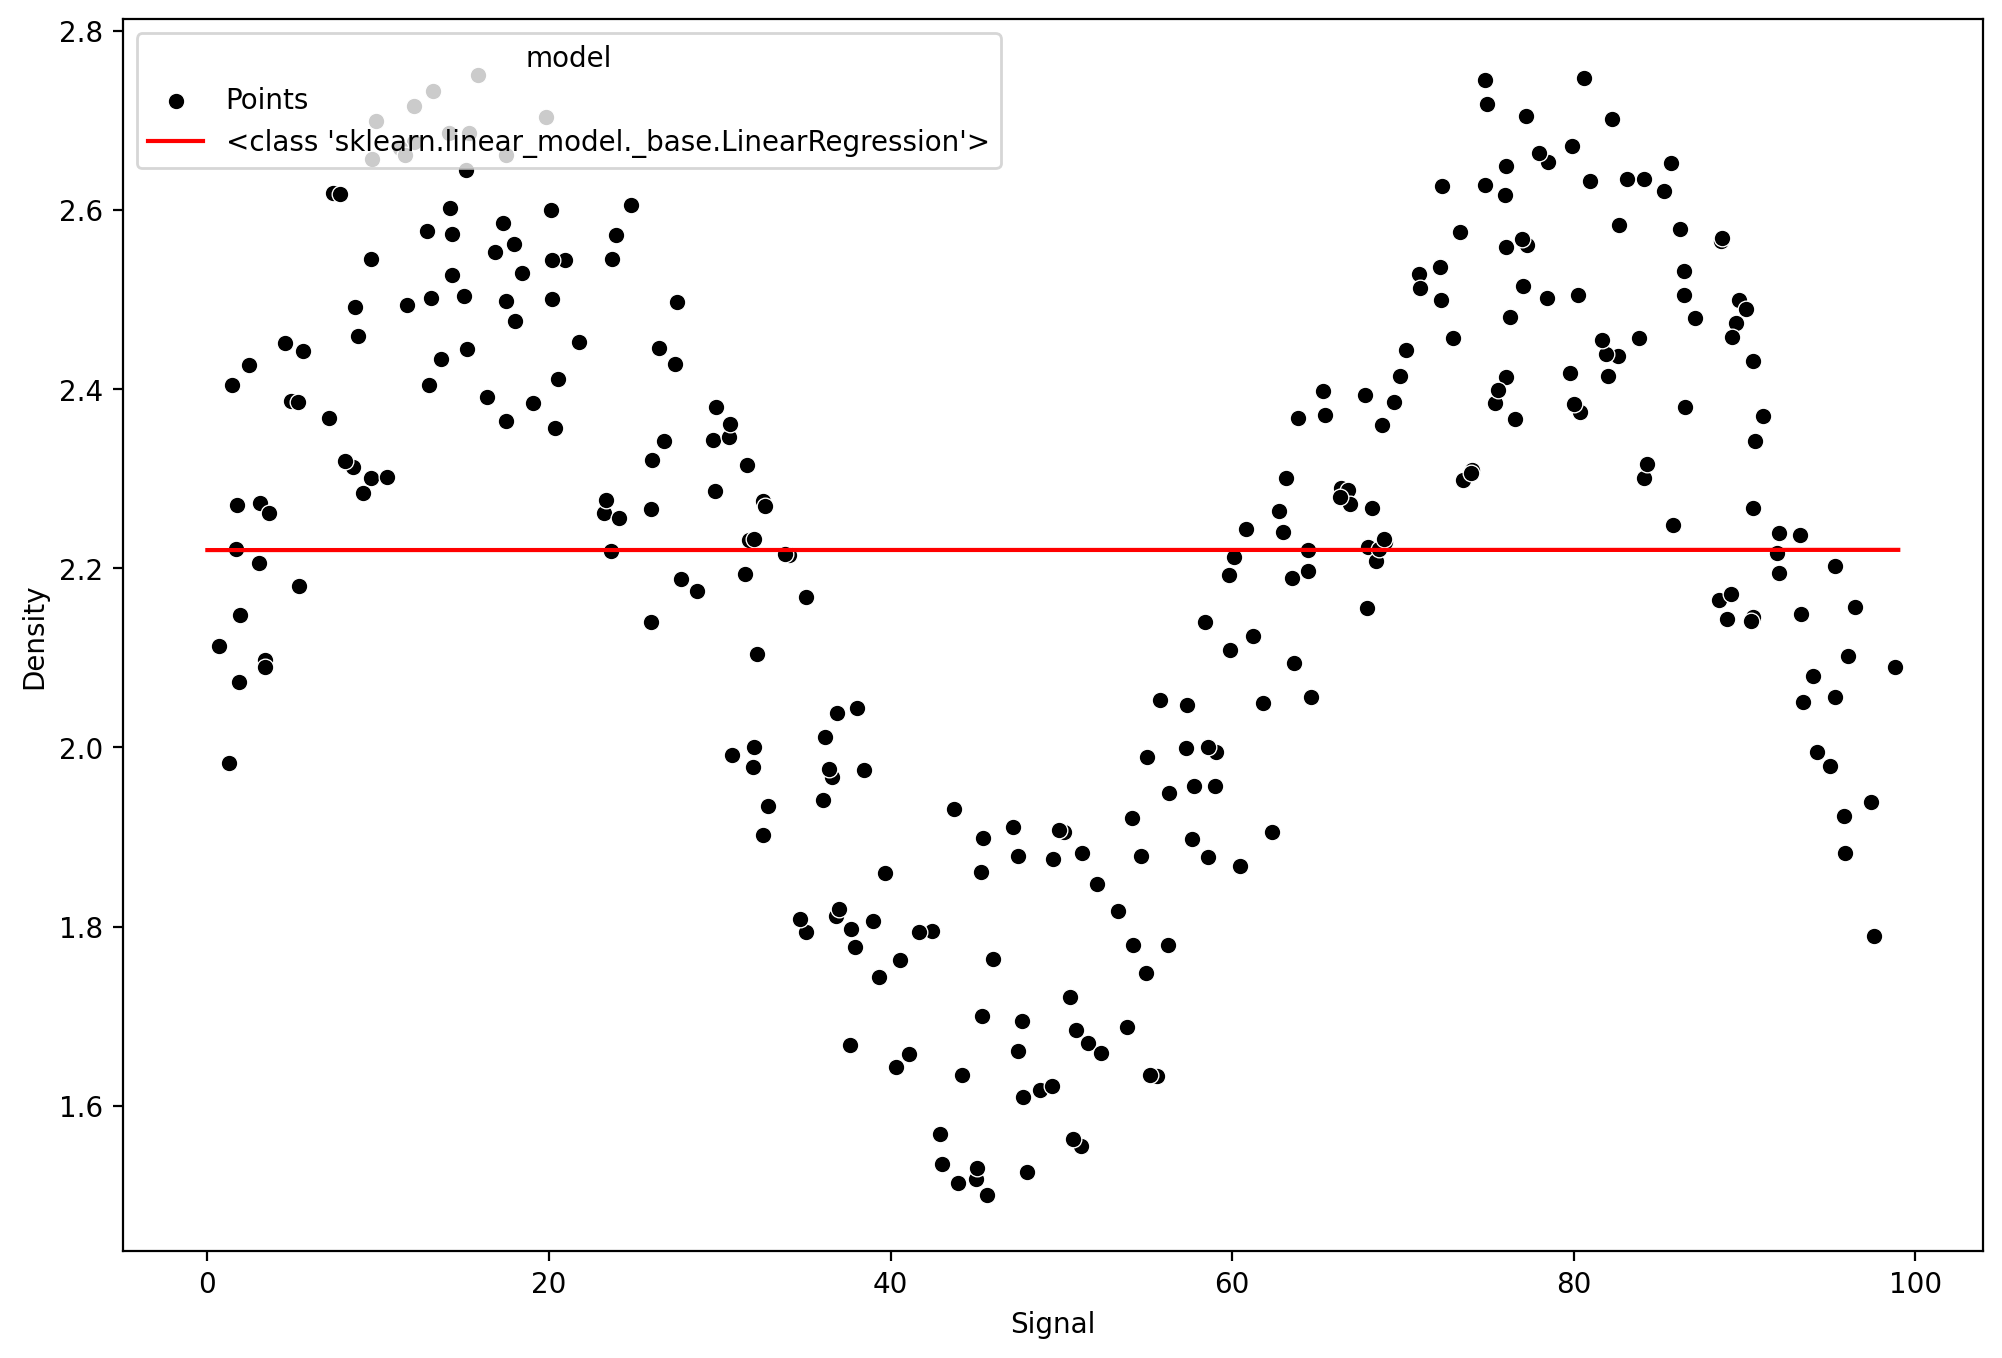

In [175]:
run_model(lr_model, X_train, y_train, X_test, y_test)

In [176]:
from sklearn.pipeline import make_pipeline

In [177]:
from sklearn.preprocessing import PolynomialFeatures

RMSE: 0.13807520083403252
MSE: 0.01906476108535841
MAE: 0.11969168049270058


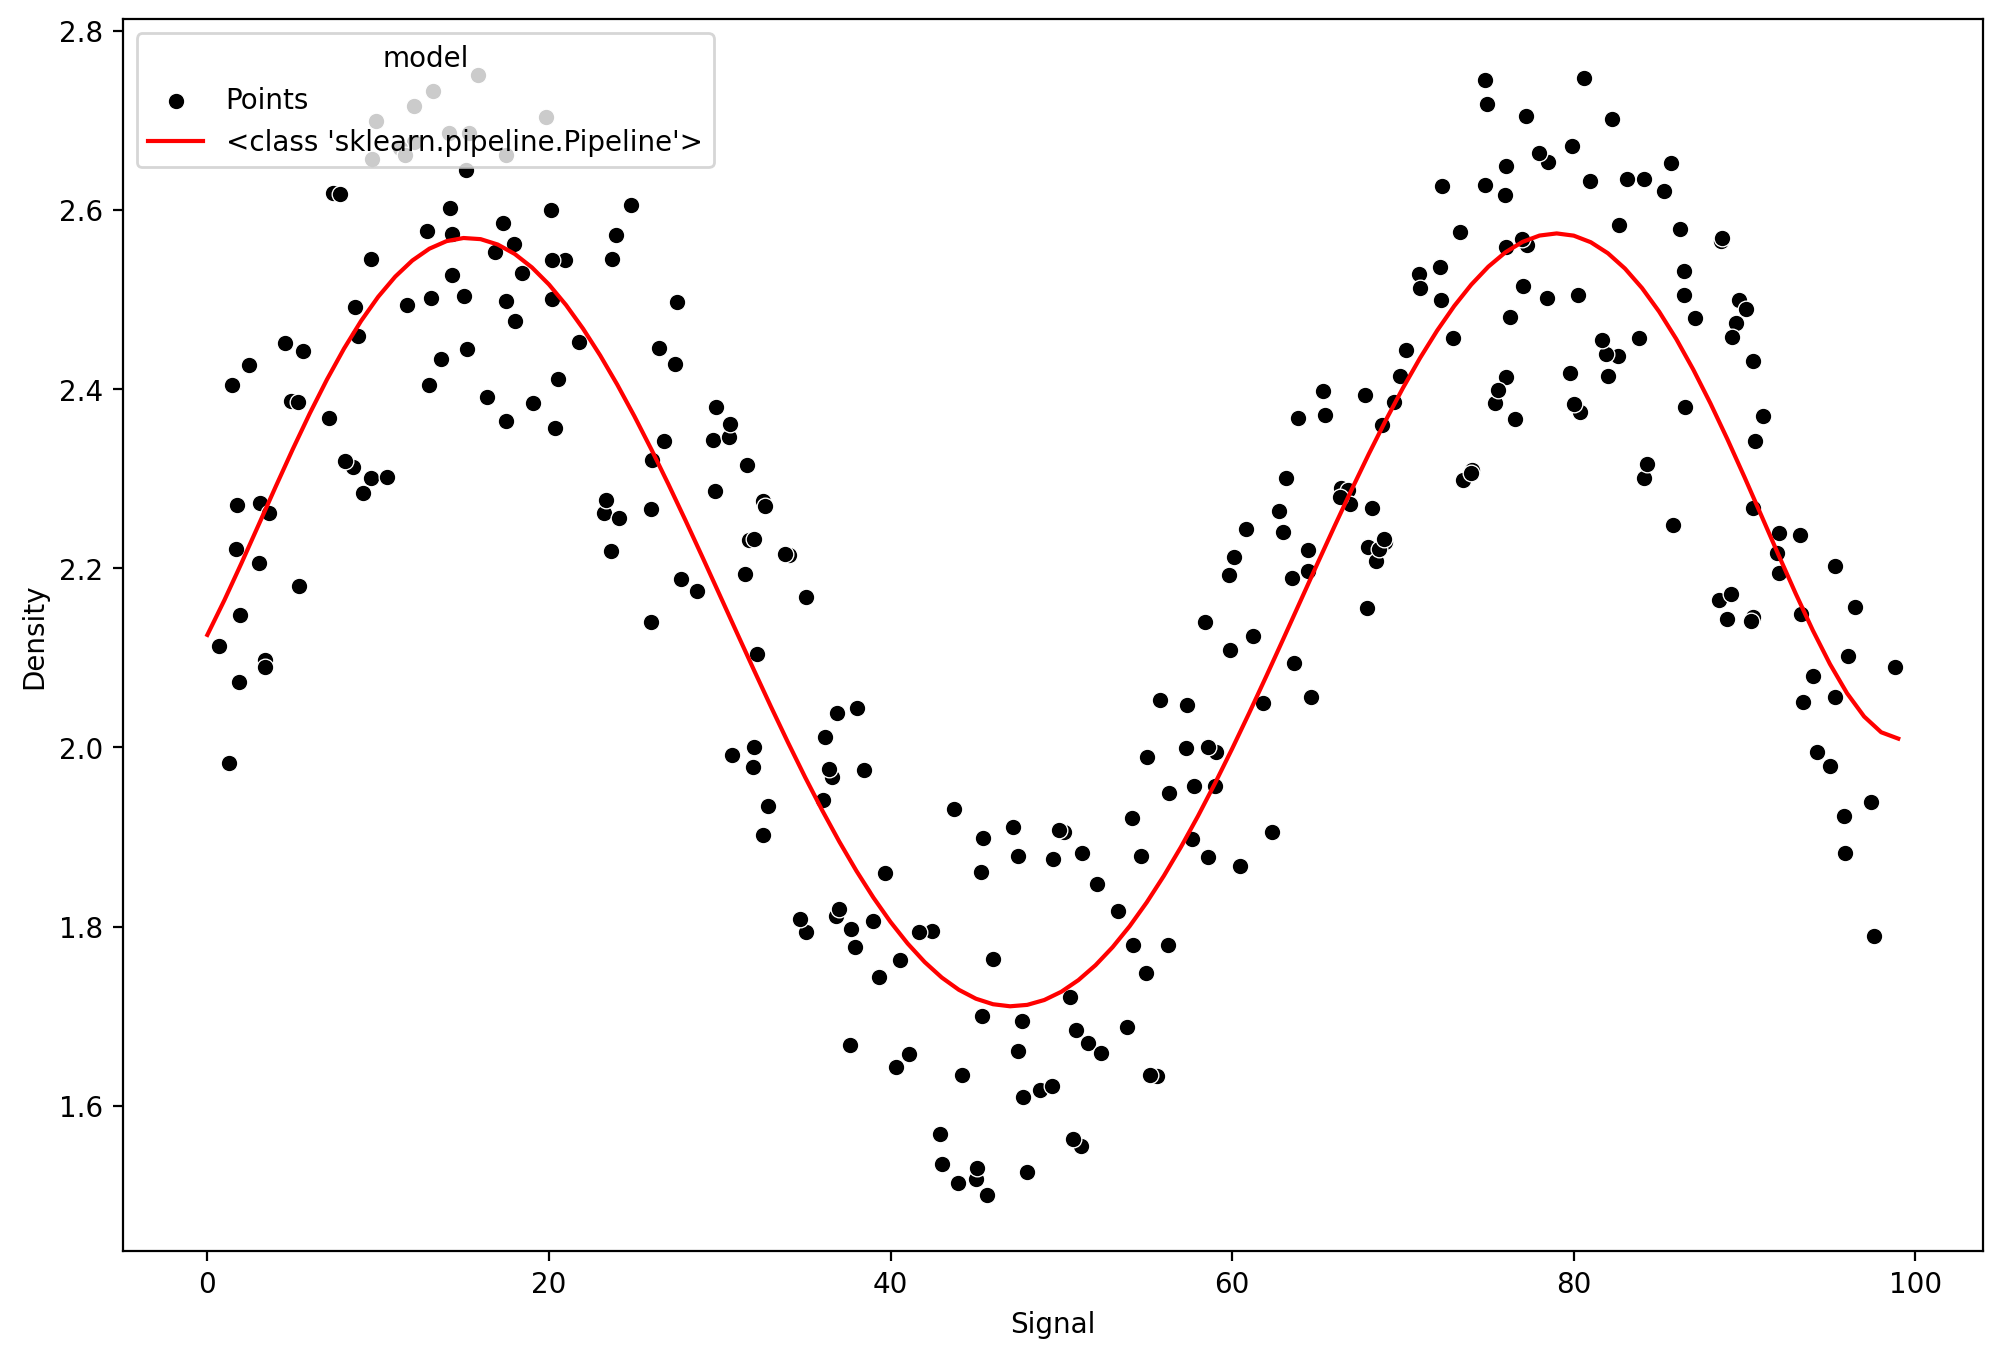

In [186]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

In [187]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MSE: 0.023210127264201276
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MSE: 0.01885317110339715
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MSE: 0.017630145285948105
MAE: 0.11635971693292672
RMSE: 0.151321497164368
MSE: 0.02289819550406583
MAE: 0.12878322504026188


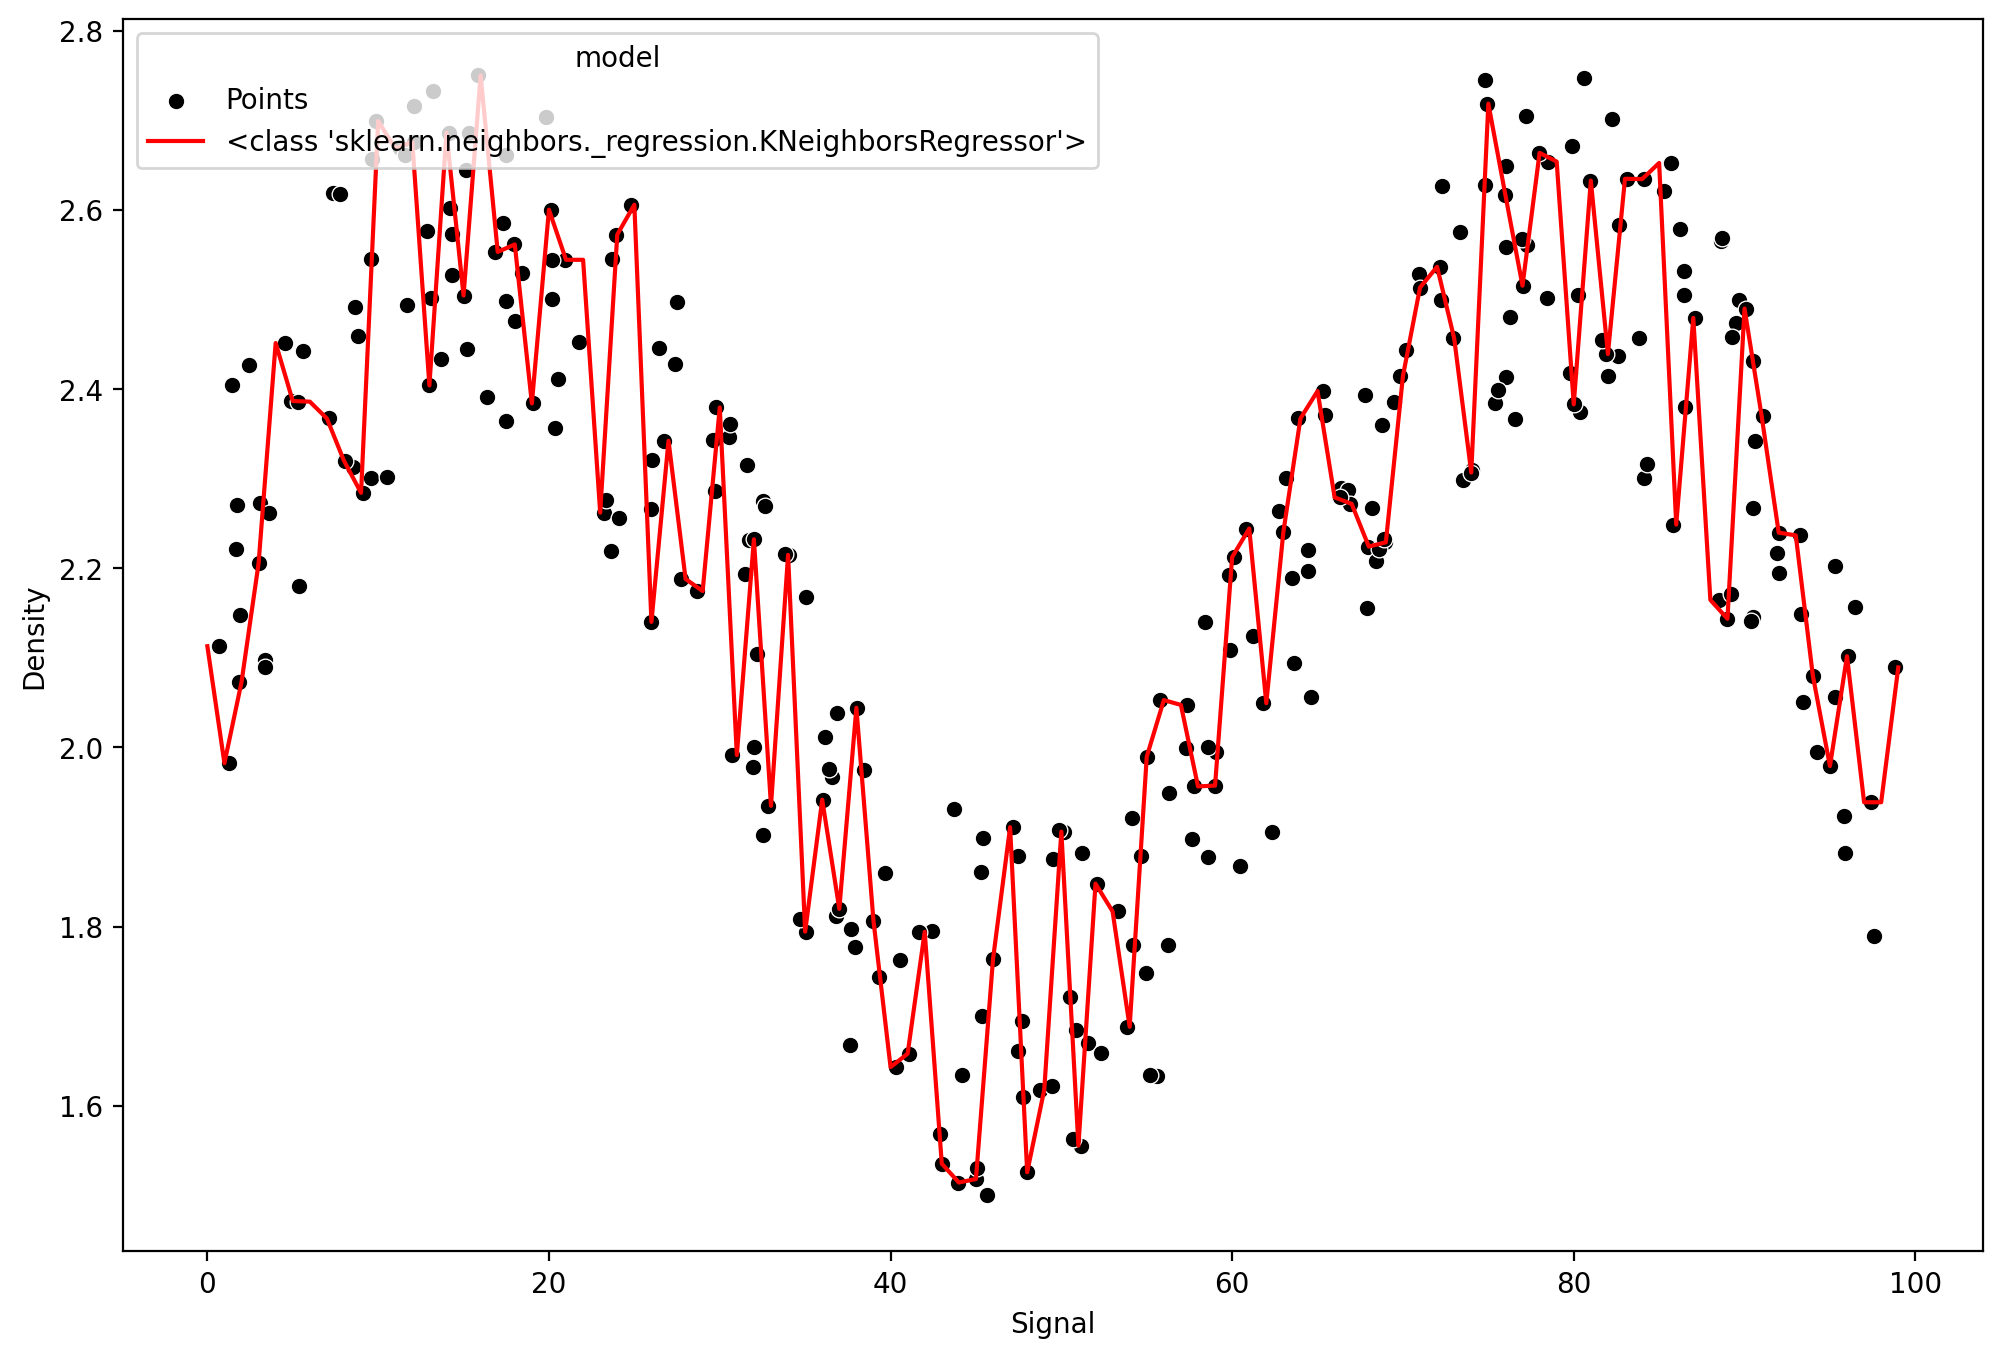

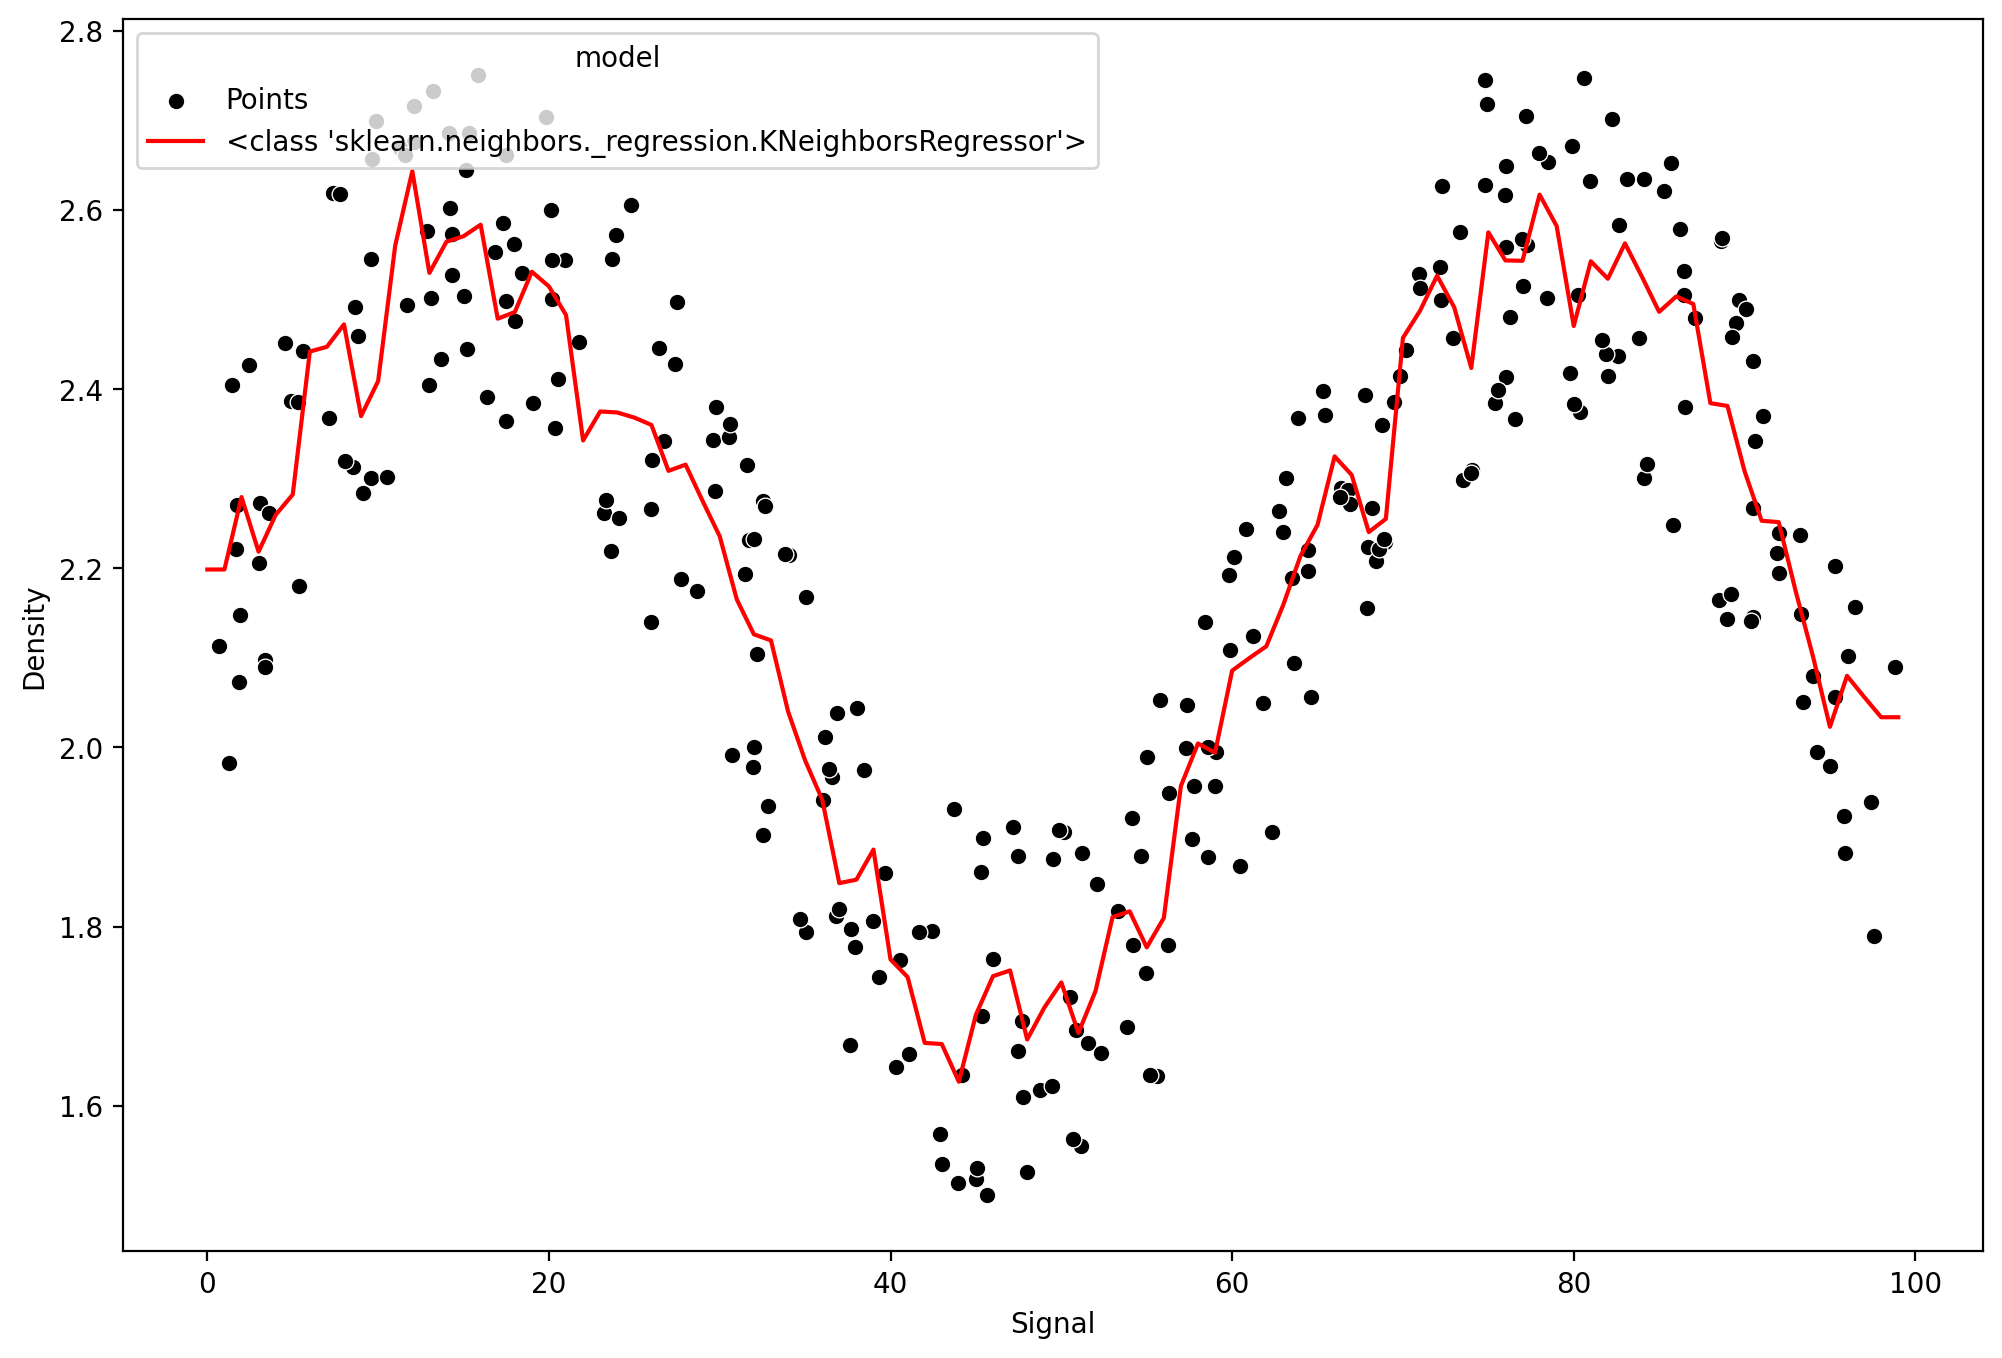

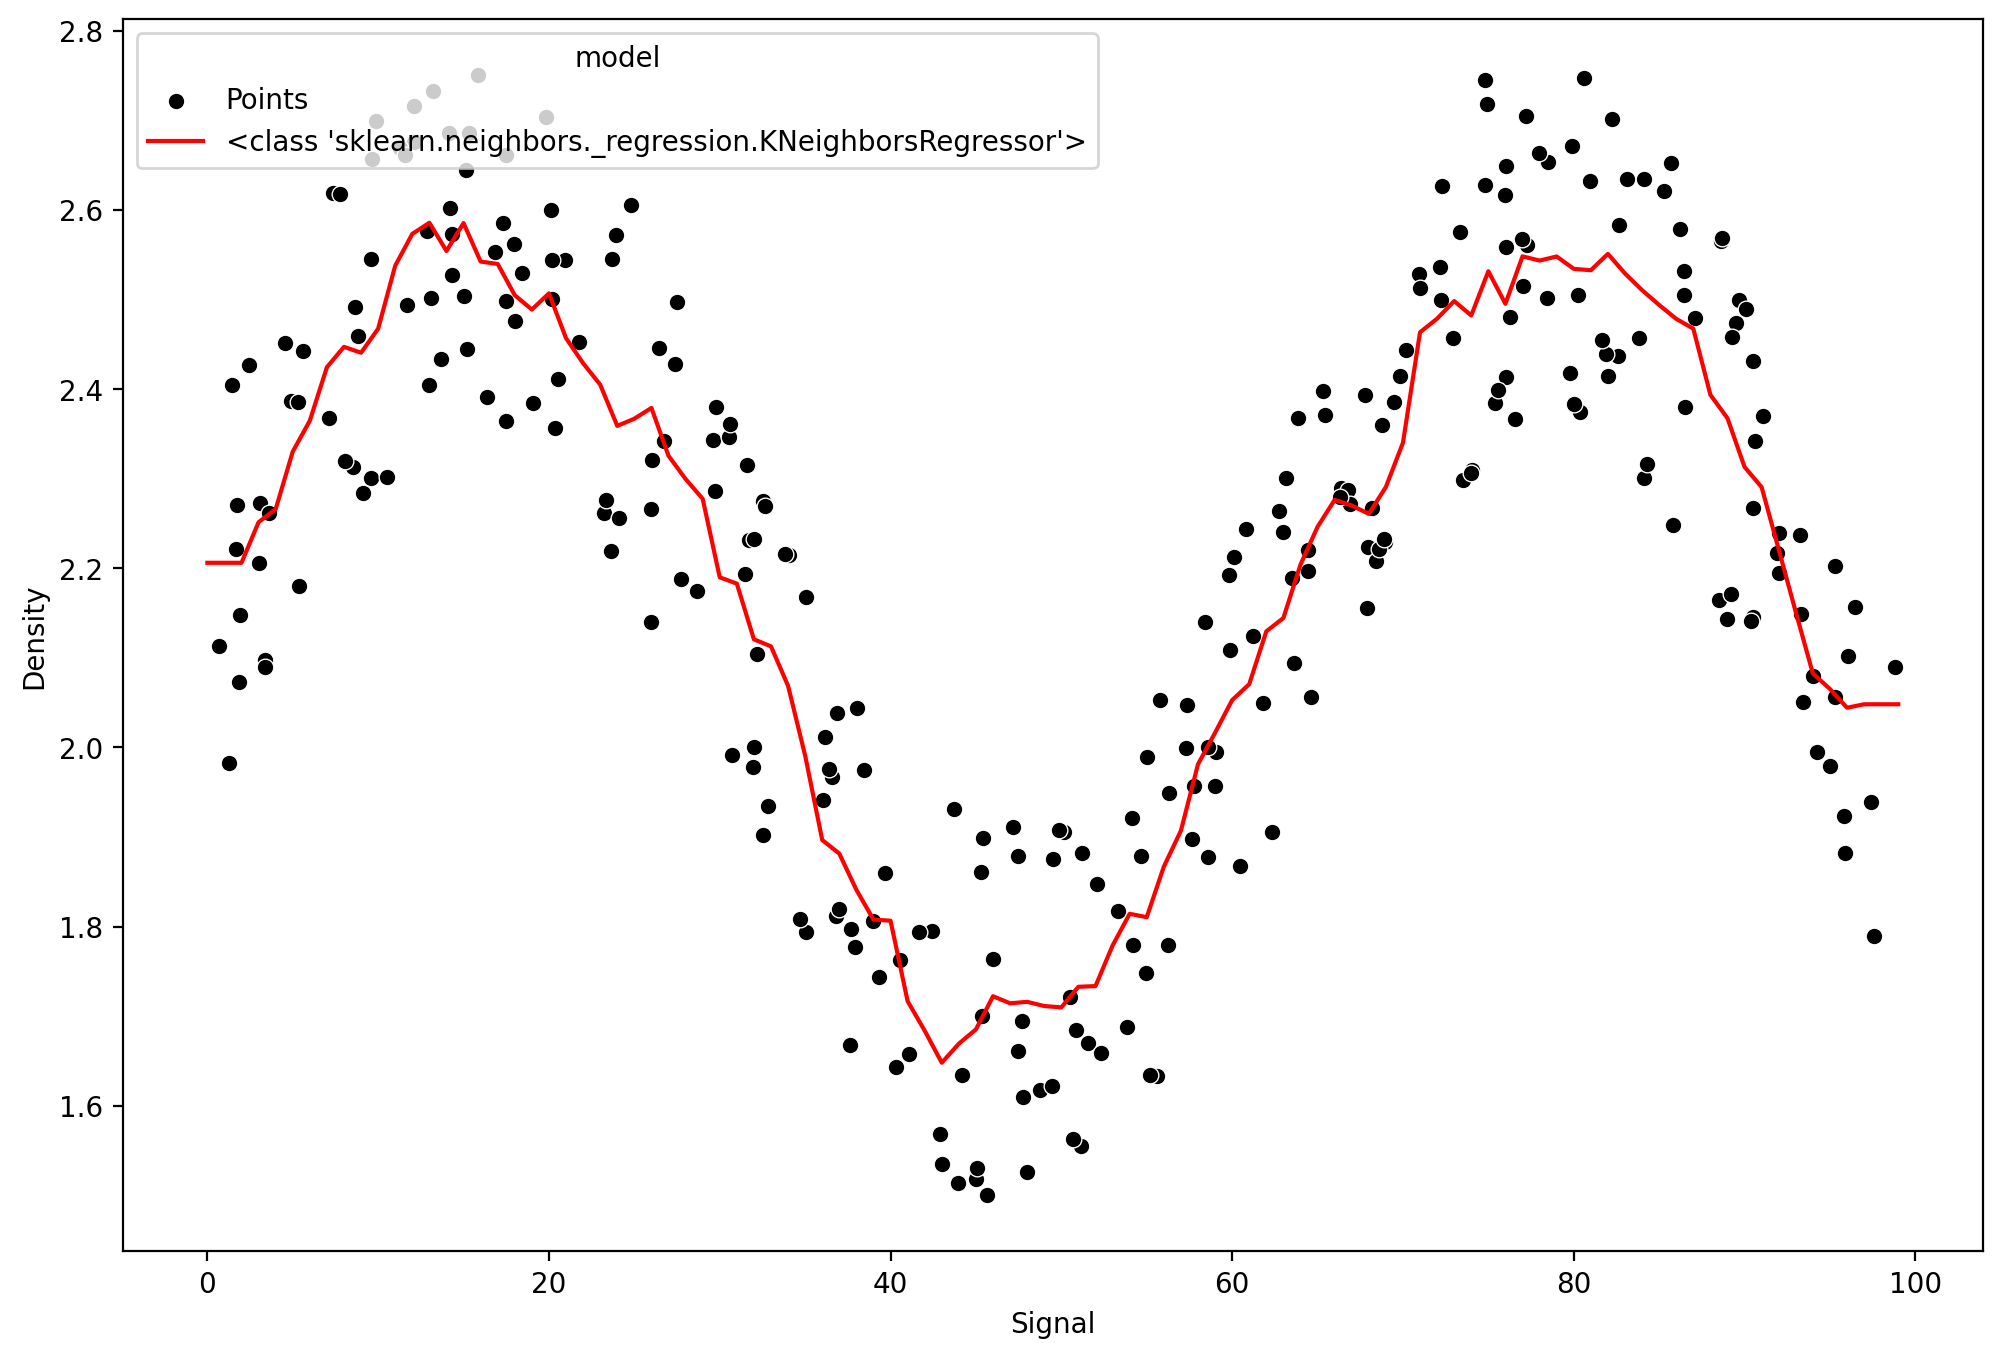

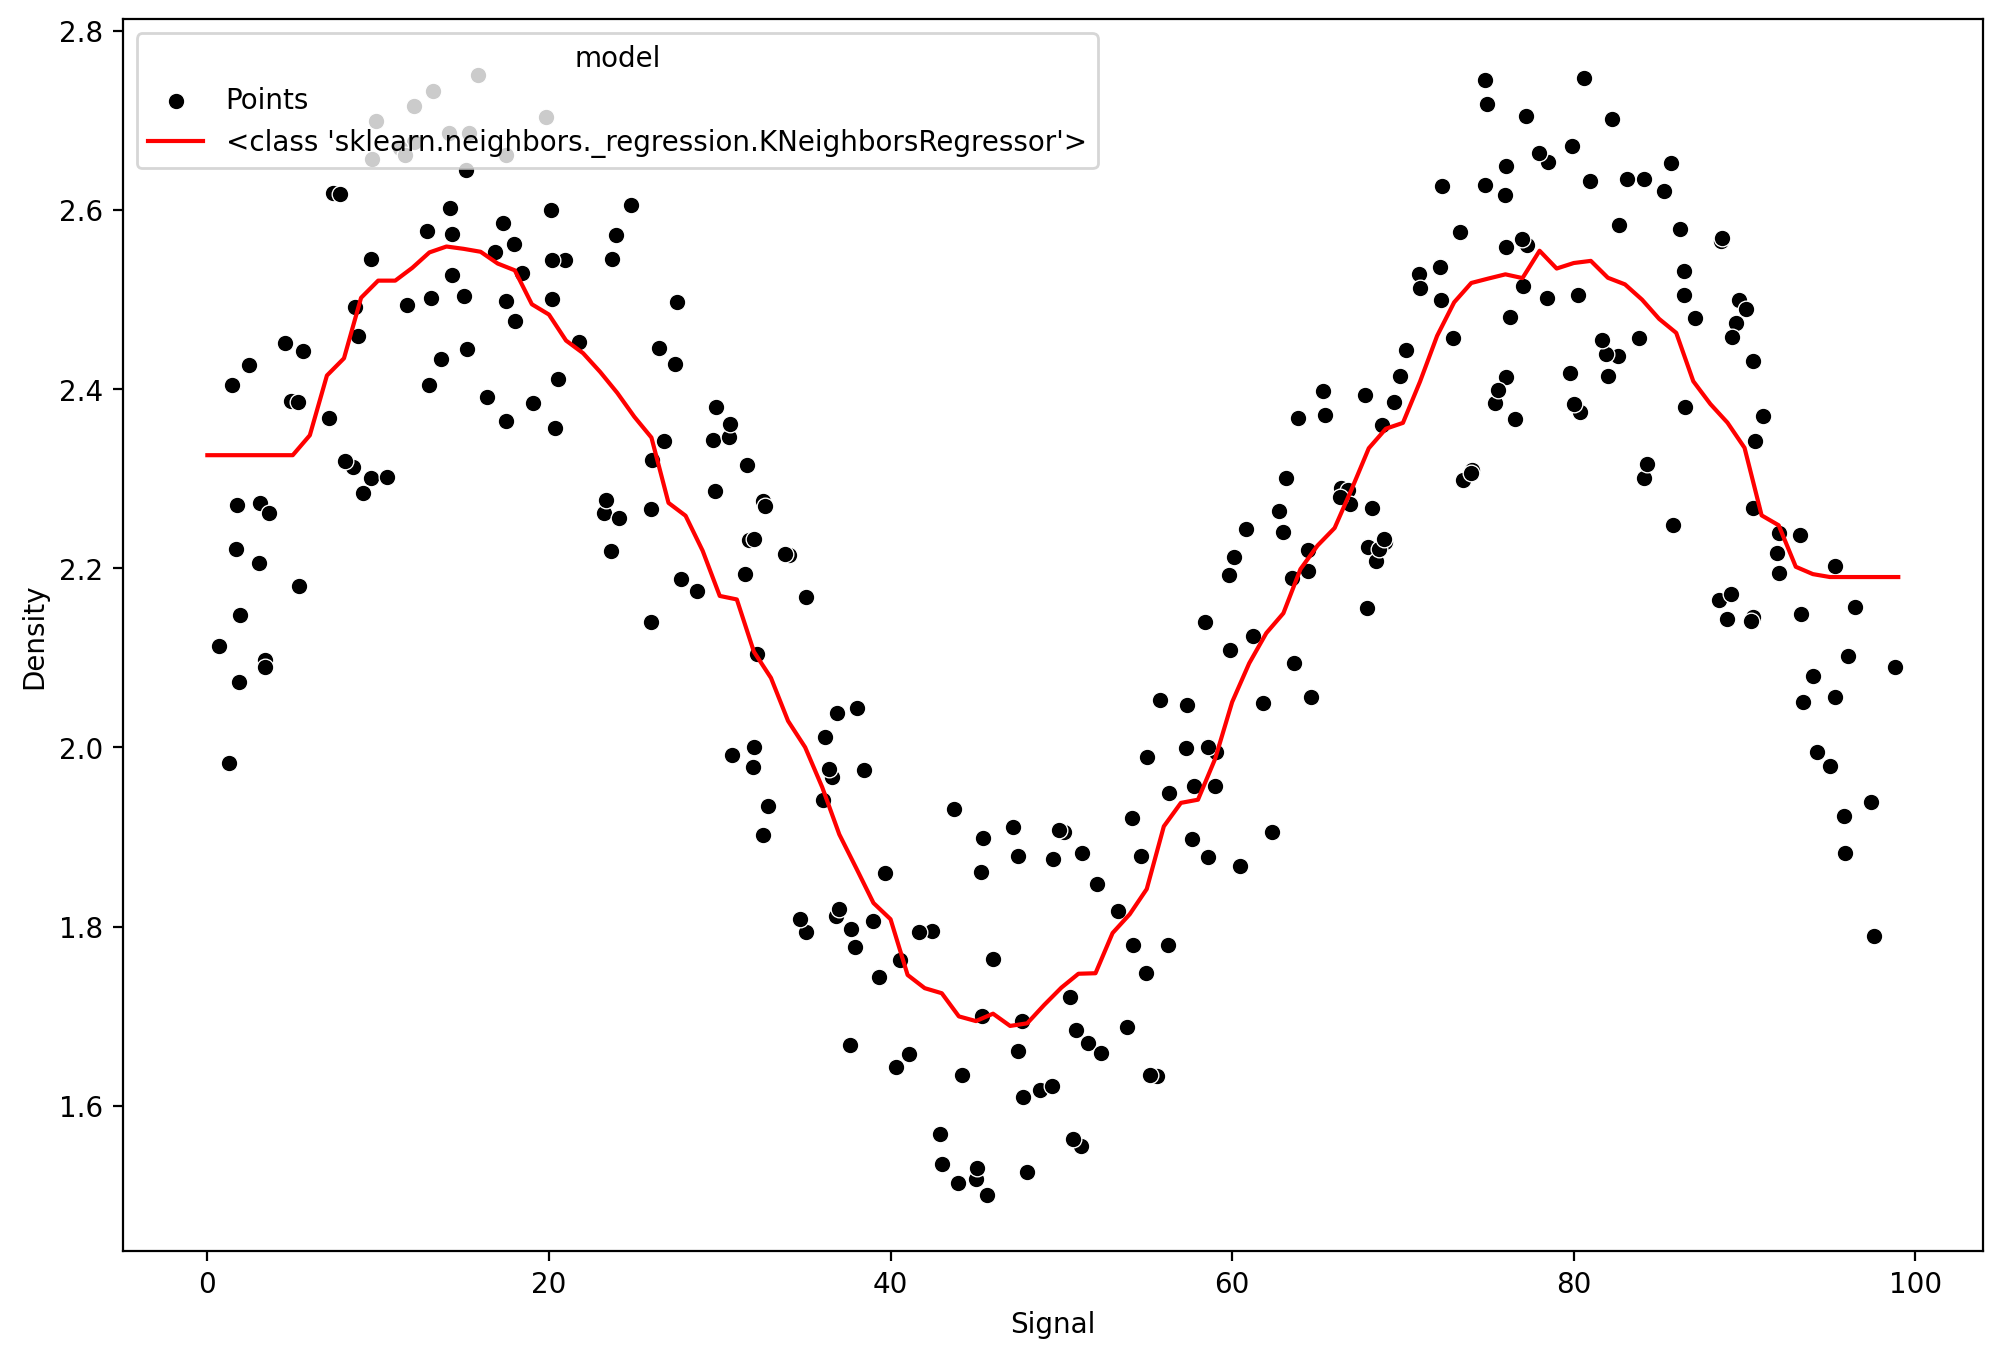

In [193]:
k_values = [1, 5, 10, 25]

for n in k_values:

    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [194]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MSE: 0.023210127264201276
MAE: 0.11877297474442378


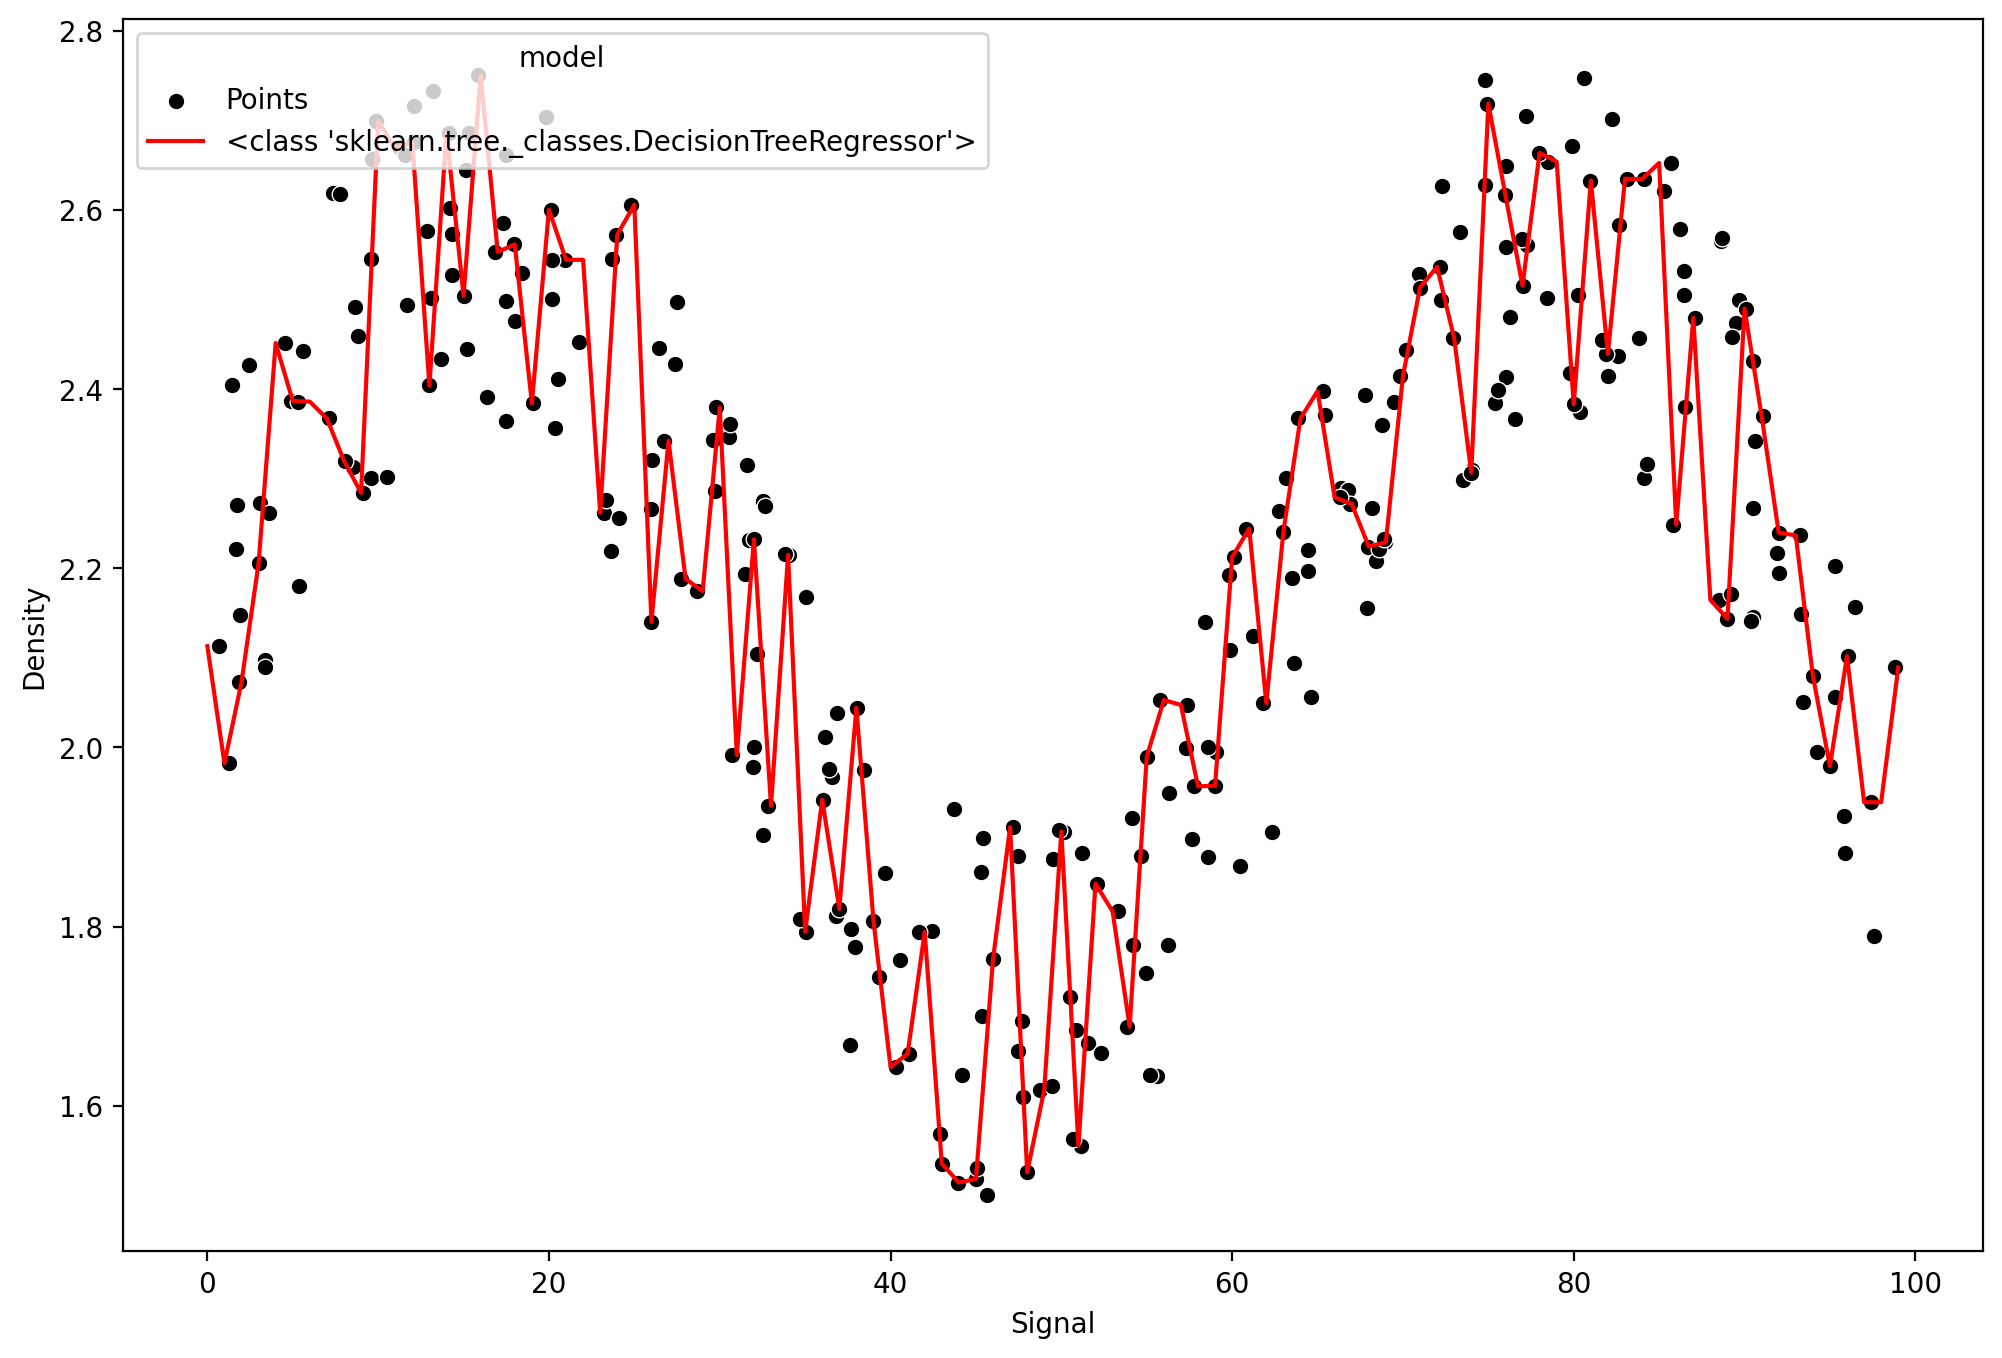

In [195]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [196]:
from sklearn.svm import SVR

In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
model = SVR()

param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
              'gamma': ['auto', 'scale'],
              'kernel': ['rbf']}

grid = GridSearchCV(model, param_grid, cv=5, verbose=2)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

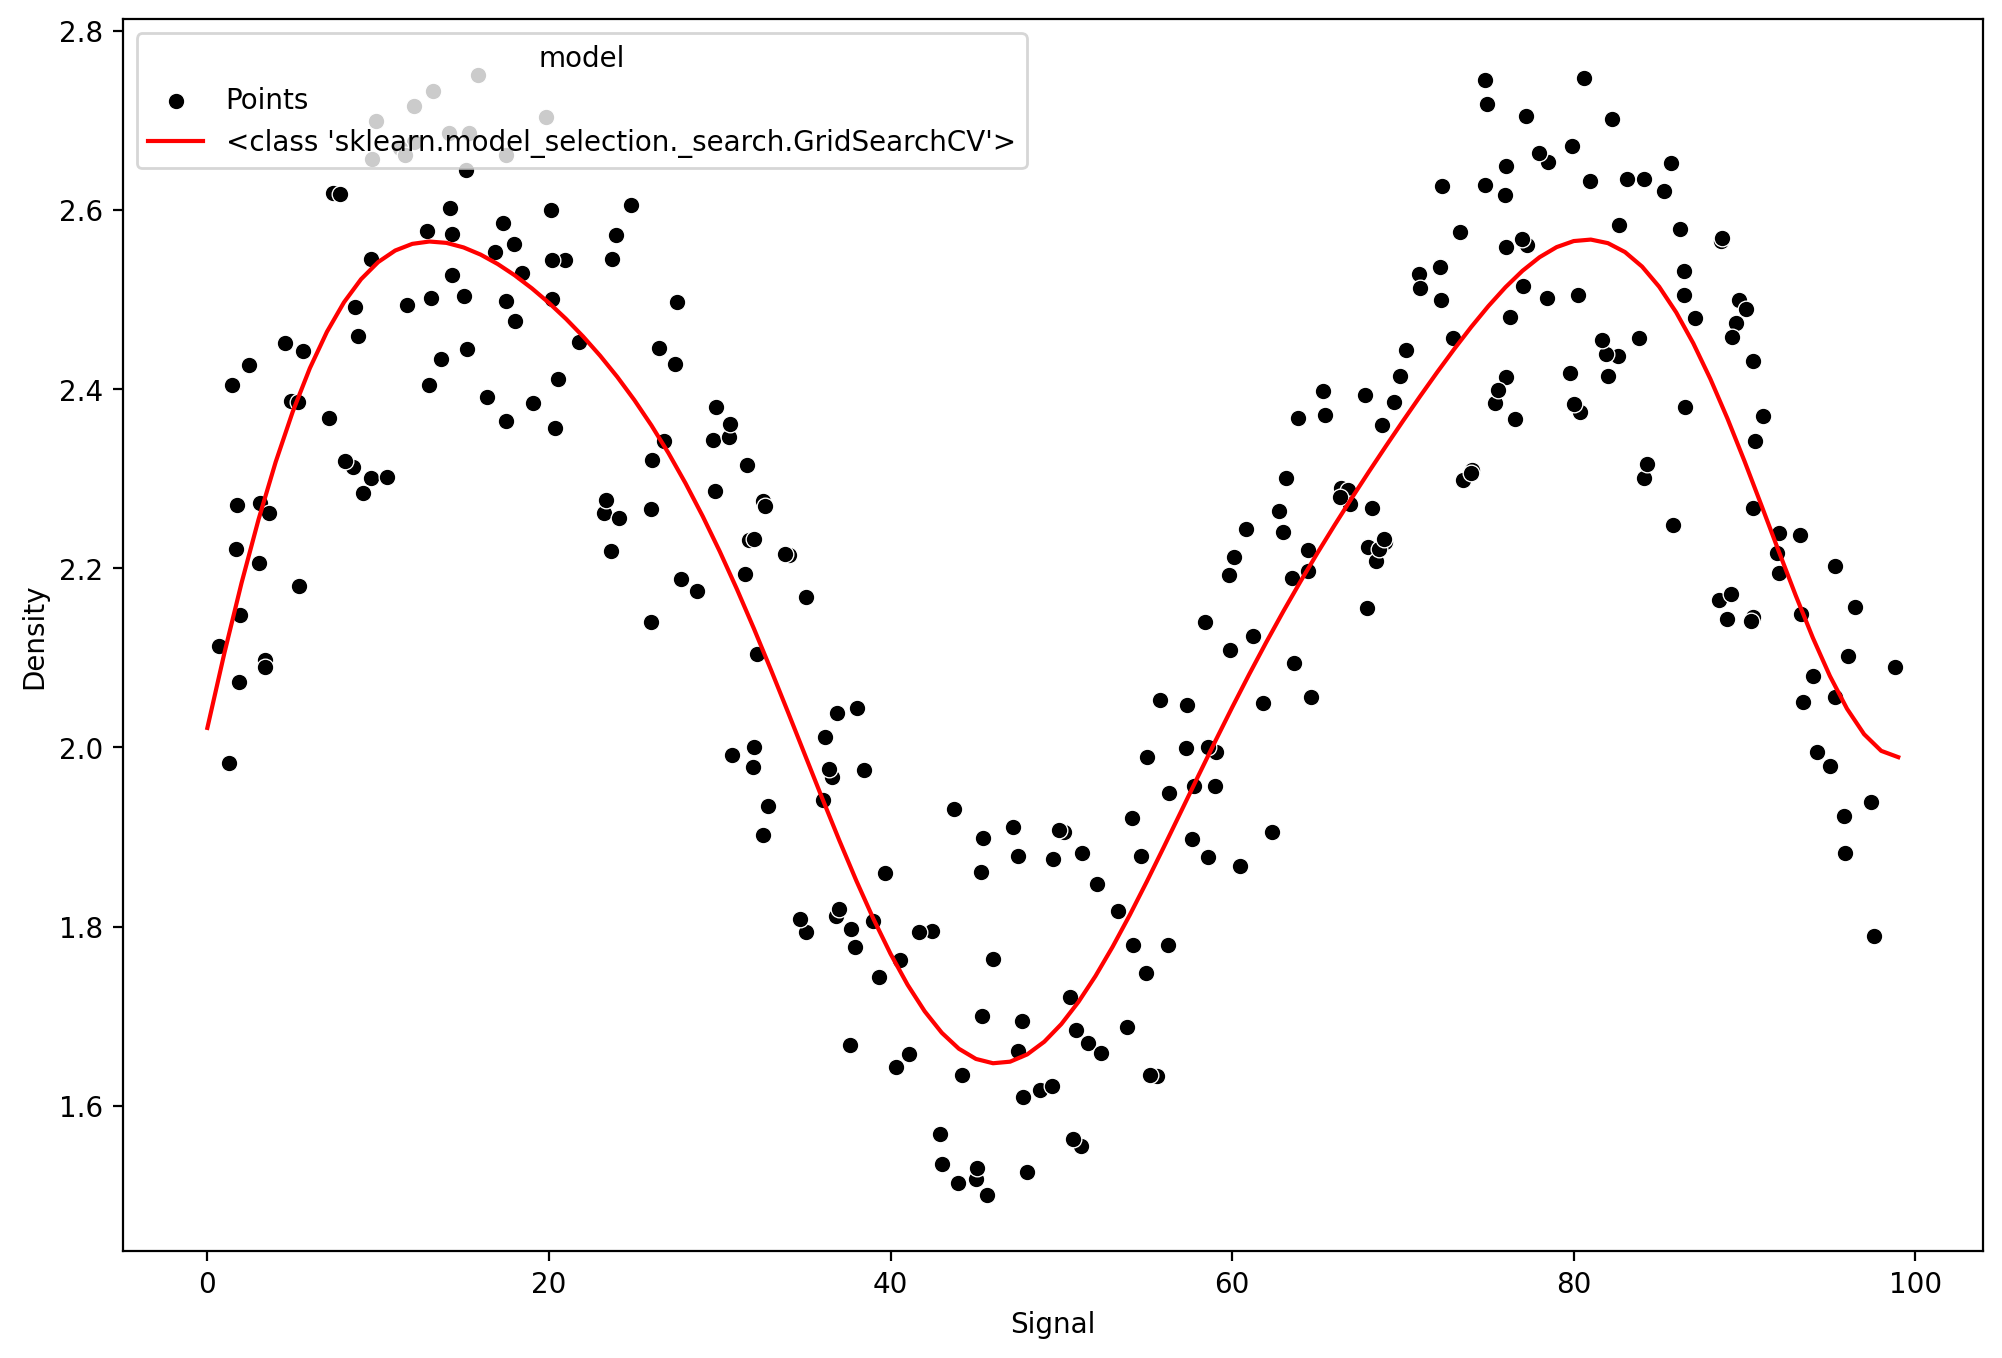

In [199]:
run_model(grid, X_train, y_train, X_test, y_test)

In [200]:
from sklearn.ensemble import RandomForestRegressor

RMSE: 0.13362169104369126
MSE: 0.017854756317375684
MAE: 0.11267379242599831


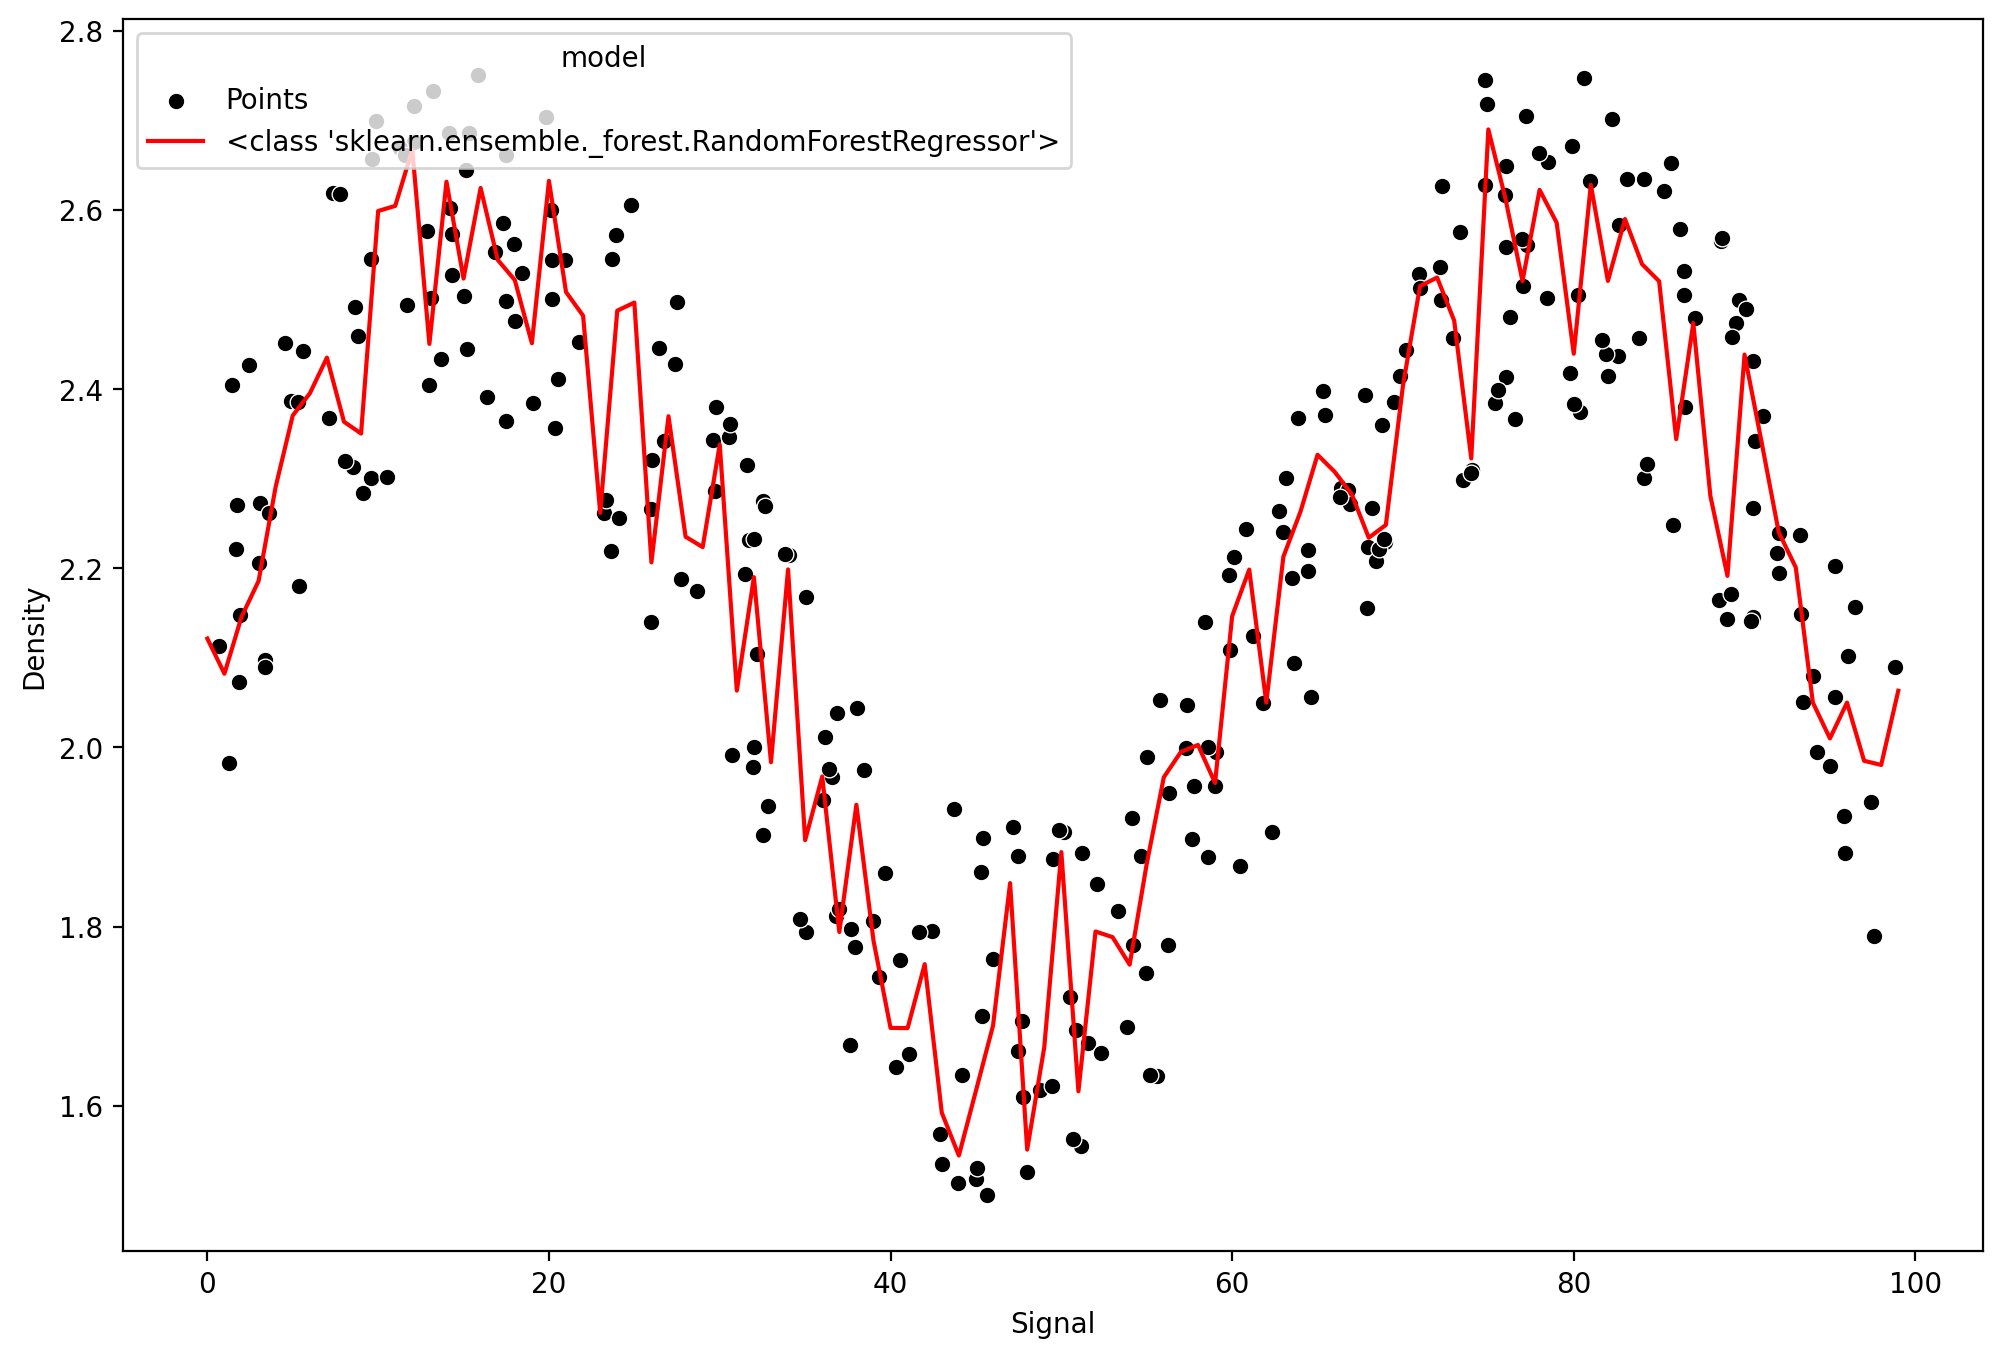

In [206]:
rfr = RandomForestRegressor(n_estimators=20)
run_model(rfr, X_train, y_train, X_test, y_test)

In [207]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294148649584667
MSE: 0.01767343883172538
MAE: 0.11318284854800689


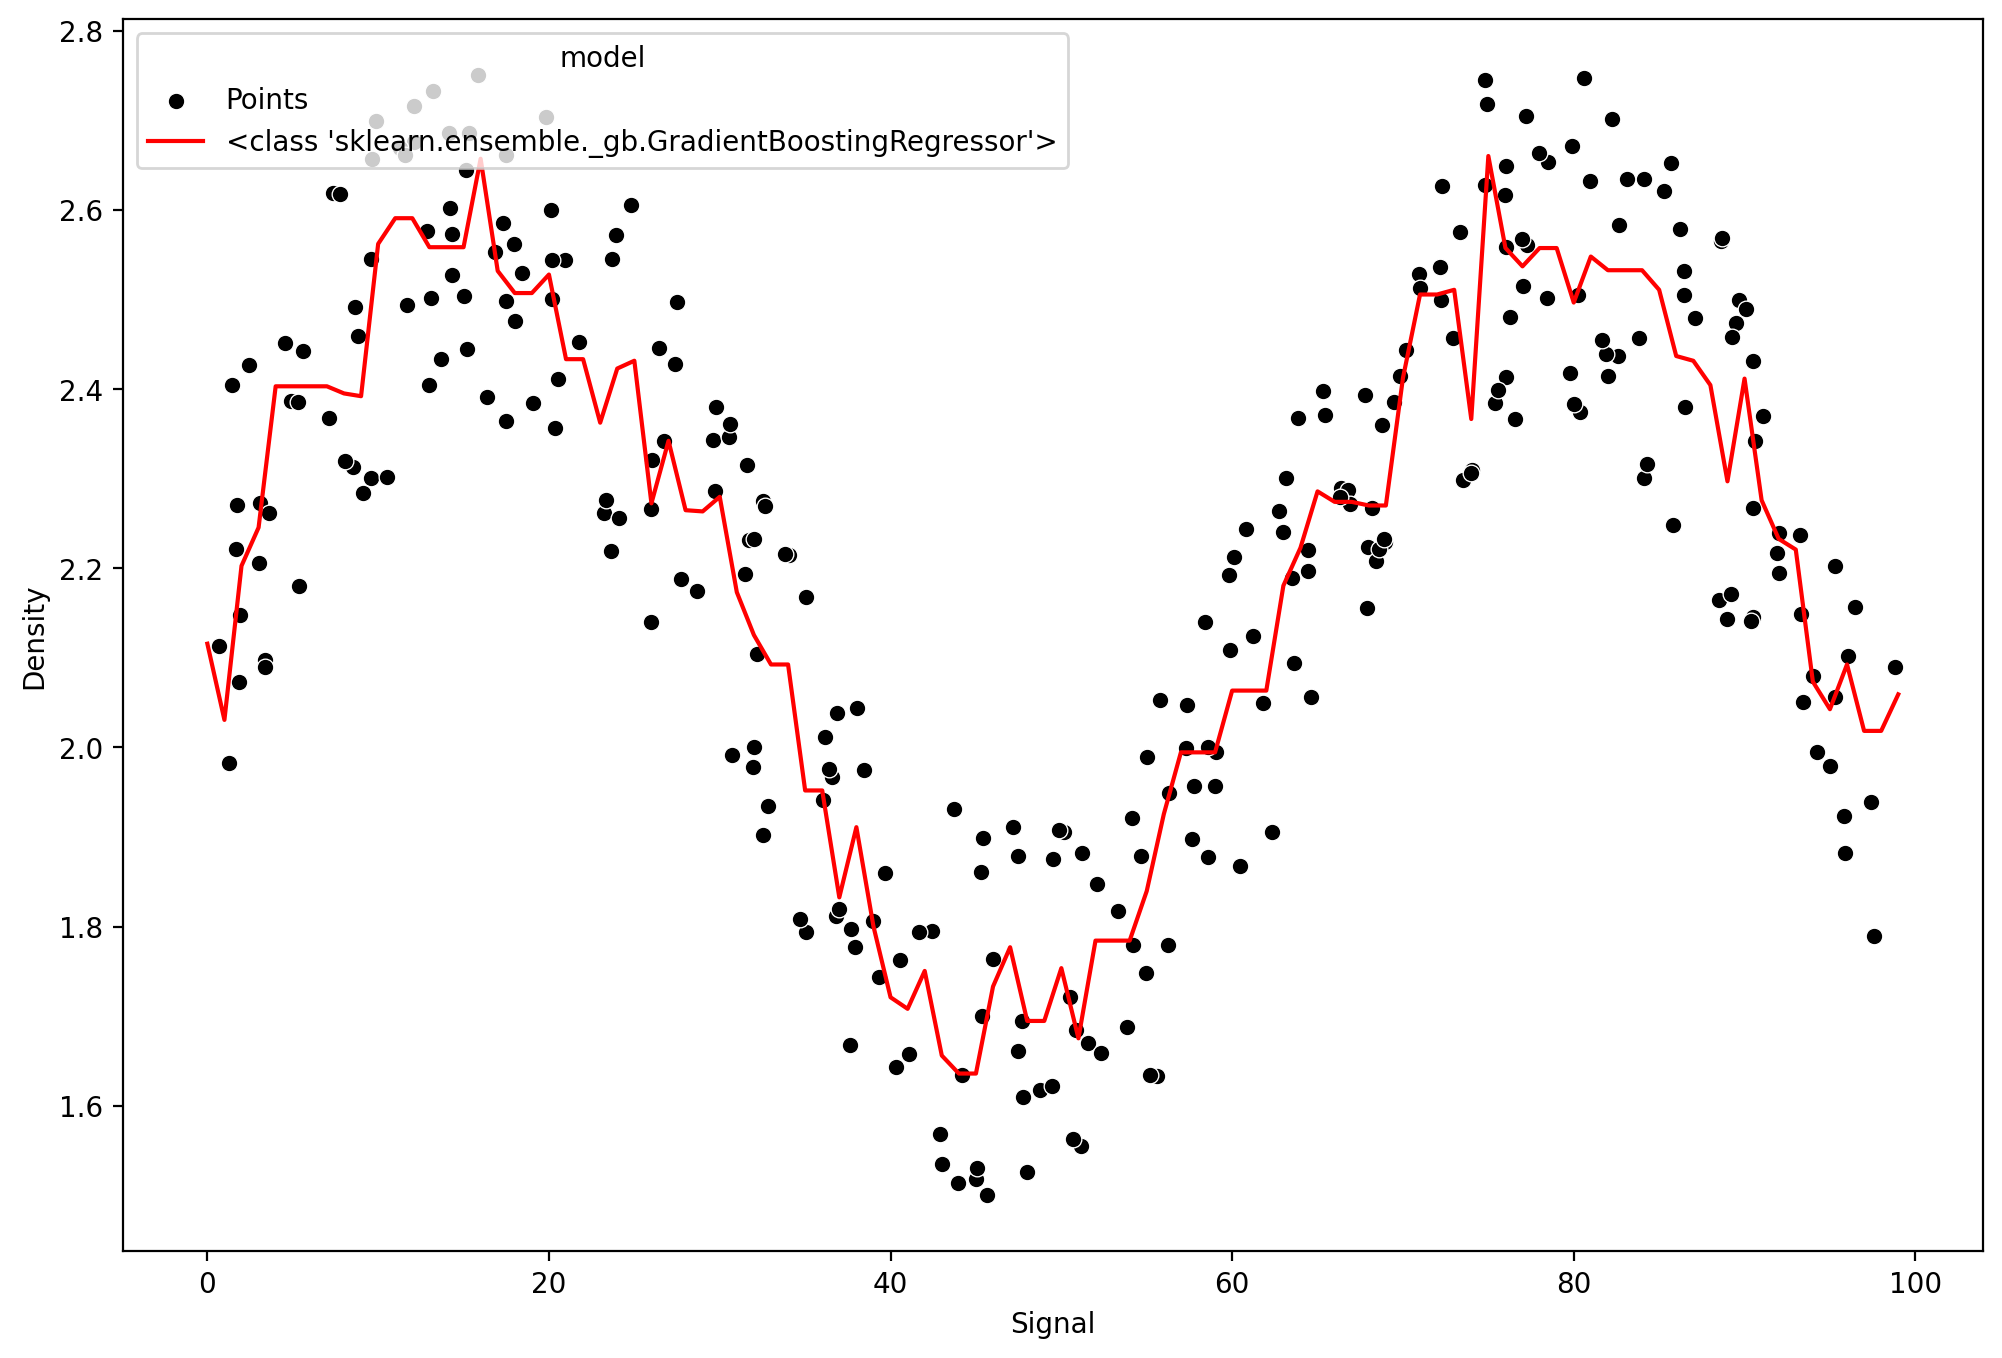

In [208]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

RMSE: 0.13838767914962277
MSE: 0.01915114974041894
MAE: 0.11952233251285894


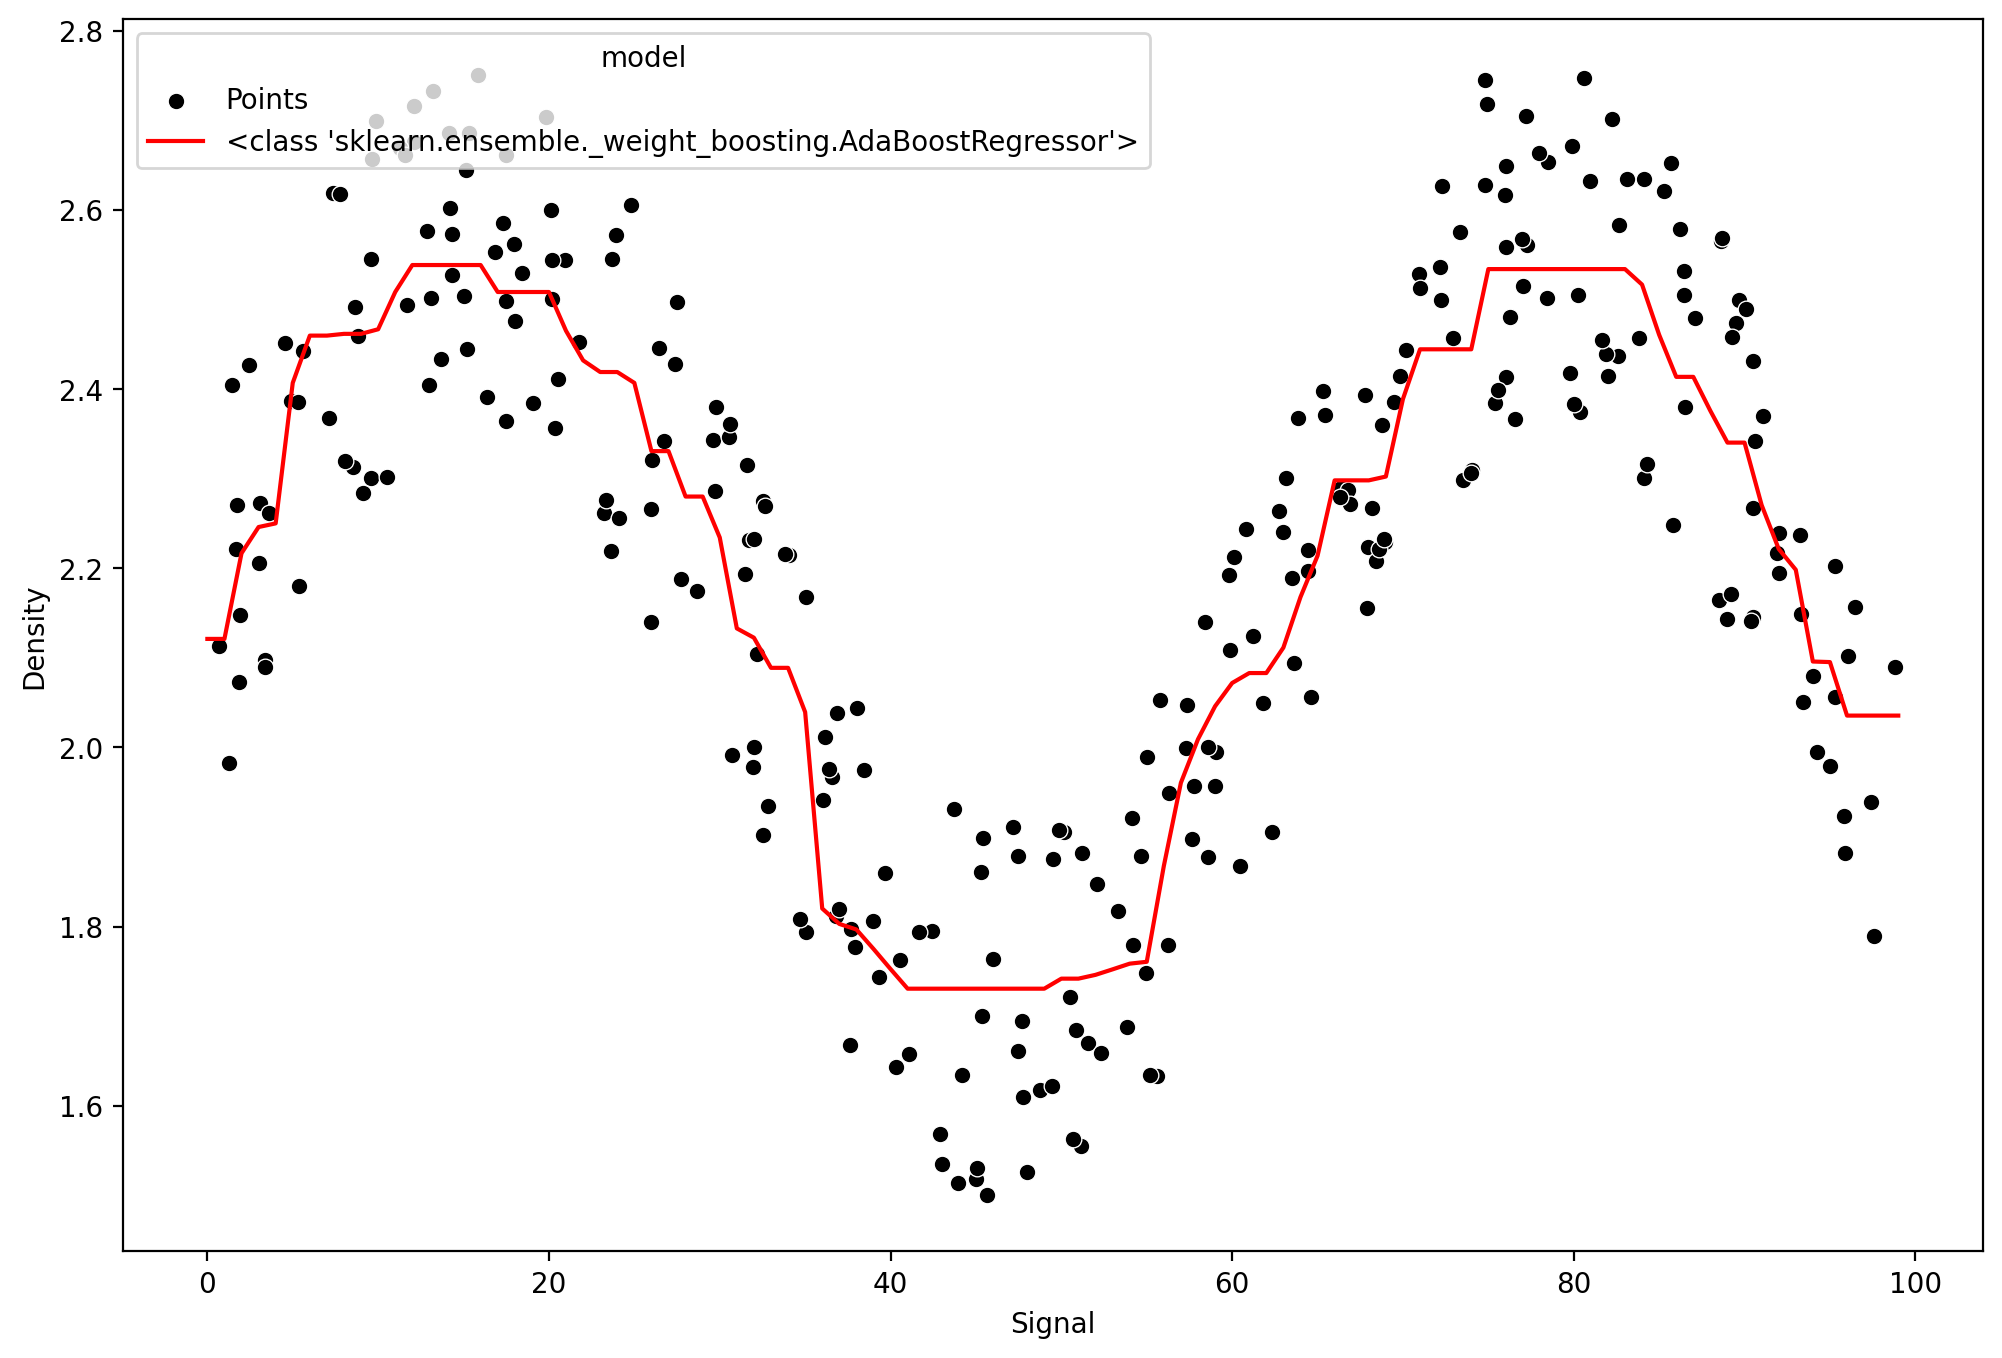

In [209]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)